<a href="https://colab.research.google.com/github/2303A51075/sathwika-AIML-2025-B16/blob/main/LABExam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [36]:
data['target'] = (data['stu_group'] == 'Science').astype(int)

In [37]:
features = ['math', 'science']  # Use these two for visualization
X = data[features]
y = data['target']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [39]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [40]:
model = LogisticRegression()
model.fit(X_train_balanced, y_train_balanced)

LogisticRegression()

In [41]:
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [42]:
print("Confusion Matrix:\n", conf_matrix)
print("\nAccuracy:", acc)
print("\nClassification Report:\n", report)

Confusion Matrix:
 [[1051  601]
 [   8   63]]

Accuracy: 0.6465467208357516

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.64      0.78      1652
           1       0.09      0.89      0.17        71

    accuracy                           0.65      1723
   macro avg       0.54      0.76      0.47      1723
weighted avg       0.96      0.65      0.75      1723



In [43]:
def plot_decision_boundary(X, y, model):
    # Create a mesh grid
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

In [46]:
import numpy as np

def plot_decision_boundary(X, y, model):
    # Create a mesh grid
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # The following lines were previously in a separate cell, causing the error.
    # They are moved inside the function to ensure xx and yy are defined.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # ... rest of your plotting code ...

In [52]:
import numpy as np
import matplotlib.pyplot as plt # Make sure to import matplotlib

def plot_decision_boundary(X, y, model):
    # Create a mesh grid
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # The following lines were previously in a separate cell, causing the error.
    # They are moved inside the function to ensure xx and yy are defined.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plotting code is now inside the function
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.title('Decision Boundary of Logistic Regression')
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


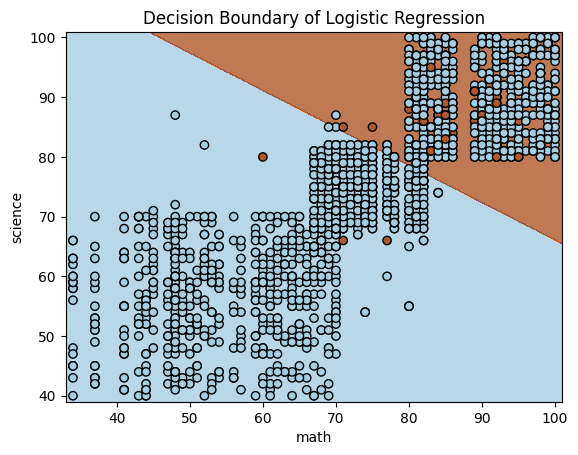

In [53]:
plot_decision_boundary(X_test, y_test, model)